# KNNeighbors classifier

In [49]:
import sys

sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from supervised.k_neighbors import KNeighborsClassifier
from utils.metrics import accuracy_score

In [35]:
sns.set_style("darkgrid")

In [51]:
blobs_x, blobs_y = make_blobs(n_samples=250, centers=4, random_state=30_08_2000, cluster_std=.6) 

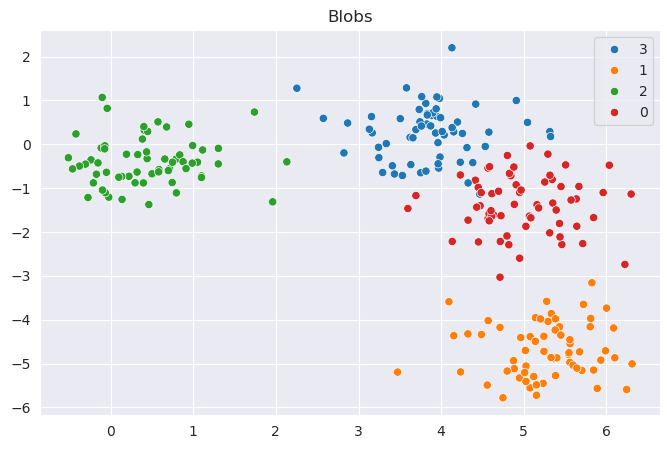

In [52]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(x=blobs_x[:, 0], y=blobs_x[:, 1], hue=blobs_y.astype("str"))
ax.set_title("Blobs")
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(blobs_x, blobs_y, test_size=.2, random_state=30_08_2000)

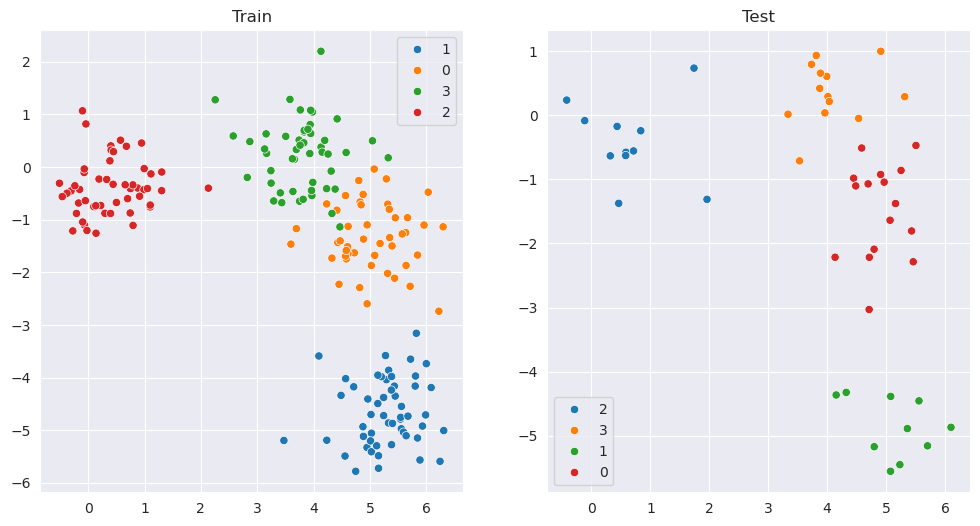

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train.astype("str"), ax=ax[0])
ax[0].set_title("Train")

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test.astype("str"), ax=ax[1])
ax[1].set_title("Test")
plt.show()

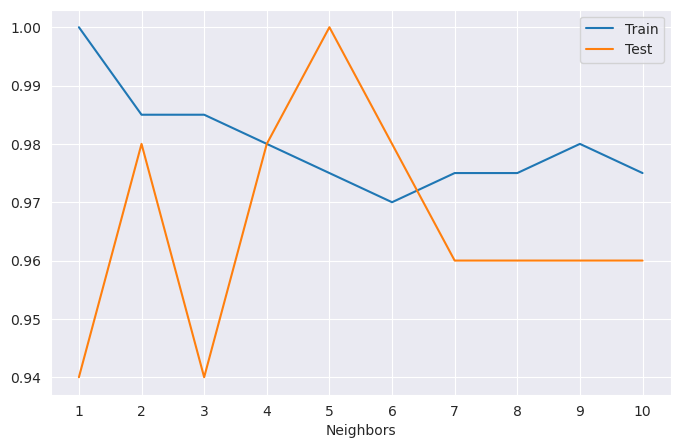

In [55]:
neighbors = list(range(1, 11))

train_scores = []
test_scores = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    train_scores.append(accuracy_score(y_train, knn.predict(X_train)))
    test_scores.append(accuracy_score(y_test, knn.predict(X_test)))

fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x=neighbors, y=train_scores, label="Train")
sns.lineplot(x=neighbors, y=test_scores, label="Test")
ax.set_xticks(neighbors)
ax.set_xlabel("Neighbors")

plt.show()